In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading The Dataset

In [7]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")
df = pd.concat([train, test], ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


## Detecting Numeric and Categorical Variables

In [8]:
def grab_col_names(dataframe, cat_th=1, car_th=20):
    # Extract columns that are string/object type
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # Identify numerical columns that have fewer unique values than cat_th (treat as cat)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th
                   and dataframe[col].dtypes != "O"]
    # Identify categorical columns that have more unique values than car_th (treat as high-card)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th
                   and dataframe[col].dtypes == "O"]

    # Combine "object-type" columns with numeric columns that should be treated as categorical
    cat_cols = cat_cols + num_but_cat
    # Exclude the high-card columns from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identify numeric columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    # Exclude columns that are actually numeric but should be treated as categorical
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Print summary of the DataFrame and classification results
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 42
num_cols: 38
cat_but_car: 1
num_but_cat: 0


## Analysis of Categorical Variables

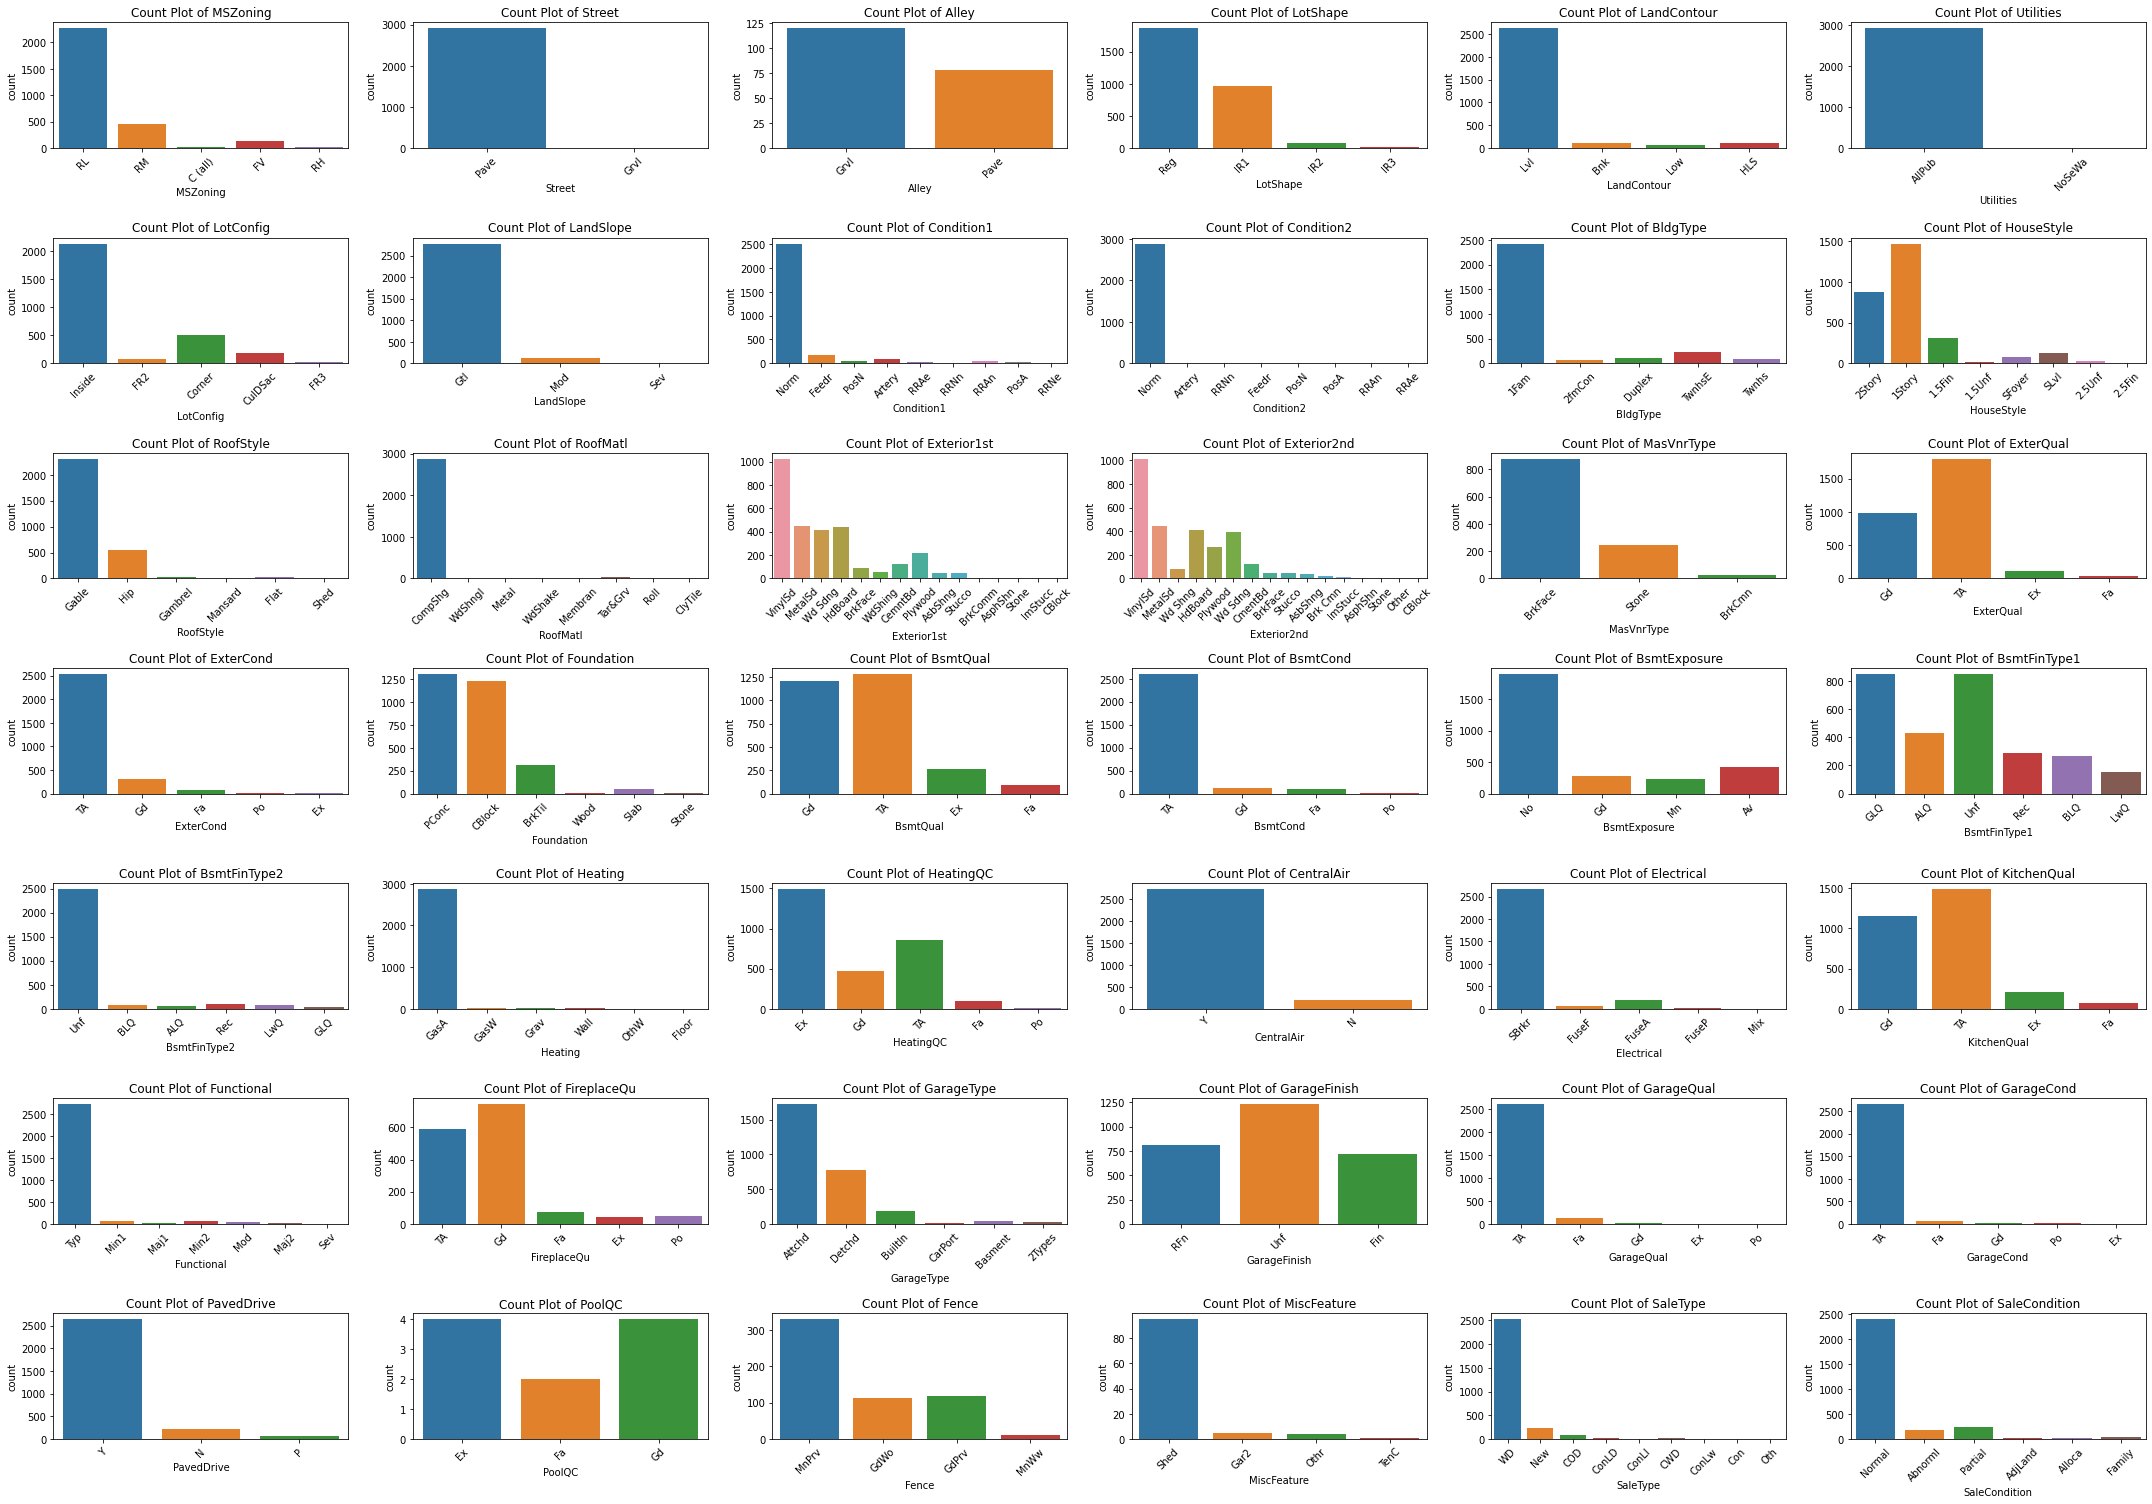

In [ ]:
import math
def cat_summary(dataframe, col_names):
    """
    Plots countplot for each categorical variable 
    """
    total_plots = len(col_names)
    rows = math.ceil(total_plots / 6)  # Number of rows needed
    fig, axes = plt.subplots(rows, 6, figsize=(30, 3 * rows))
    axes = axes.flatten()  # Flatten in case of multiple rows
    for idx, col in enumerate(col_names):
        sns.countplot(x=dataframe[col], data=dataframe, ax=axes[idx])
        axes[idx].set_title(f"Count Plot of {col}")
        axes[idx].tick_params(axis='x', rotation=45)
    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

cat_summary(df, cat_cols)

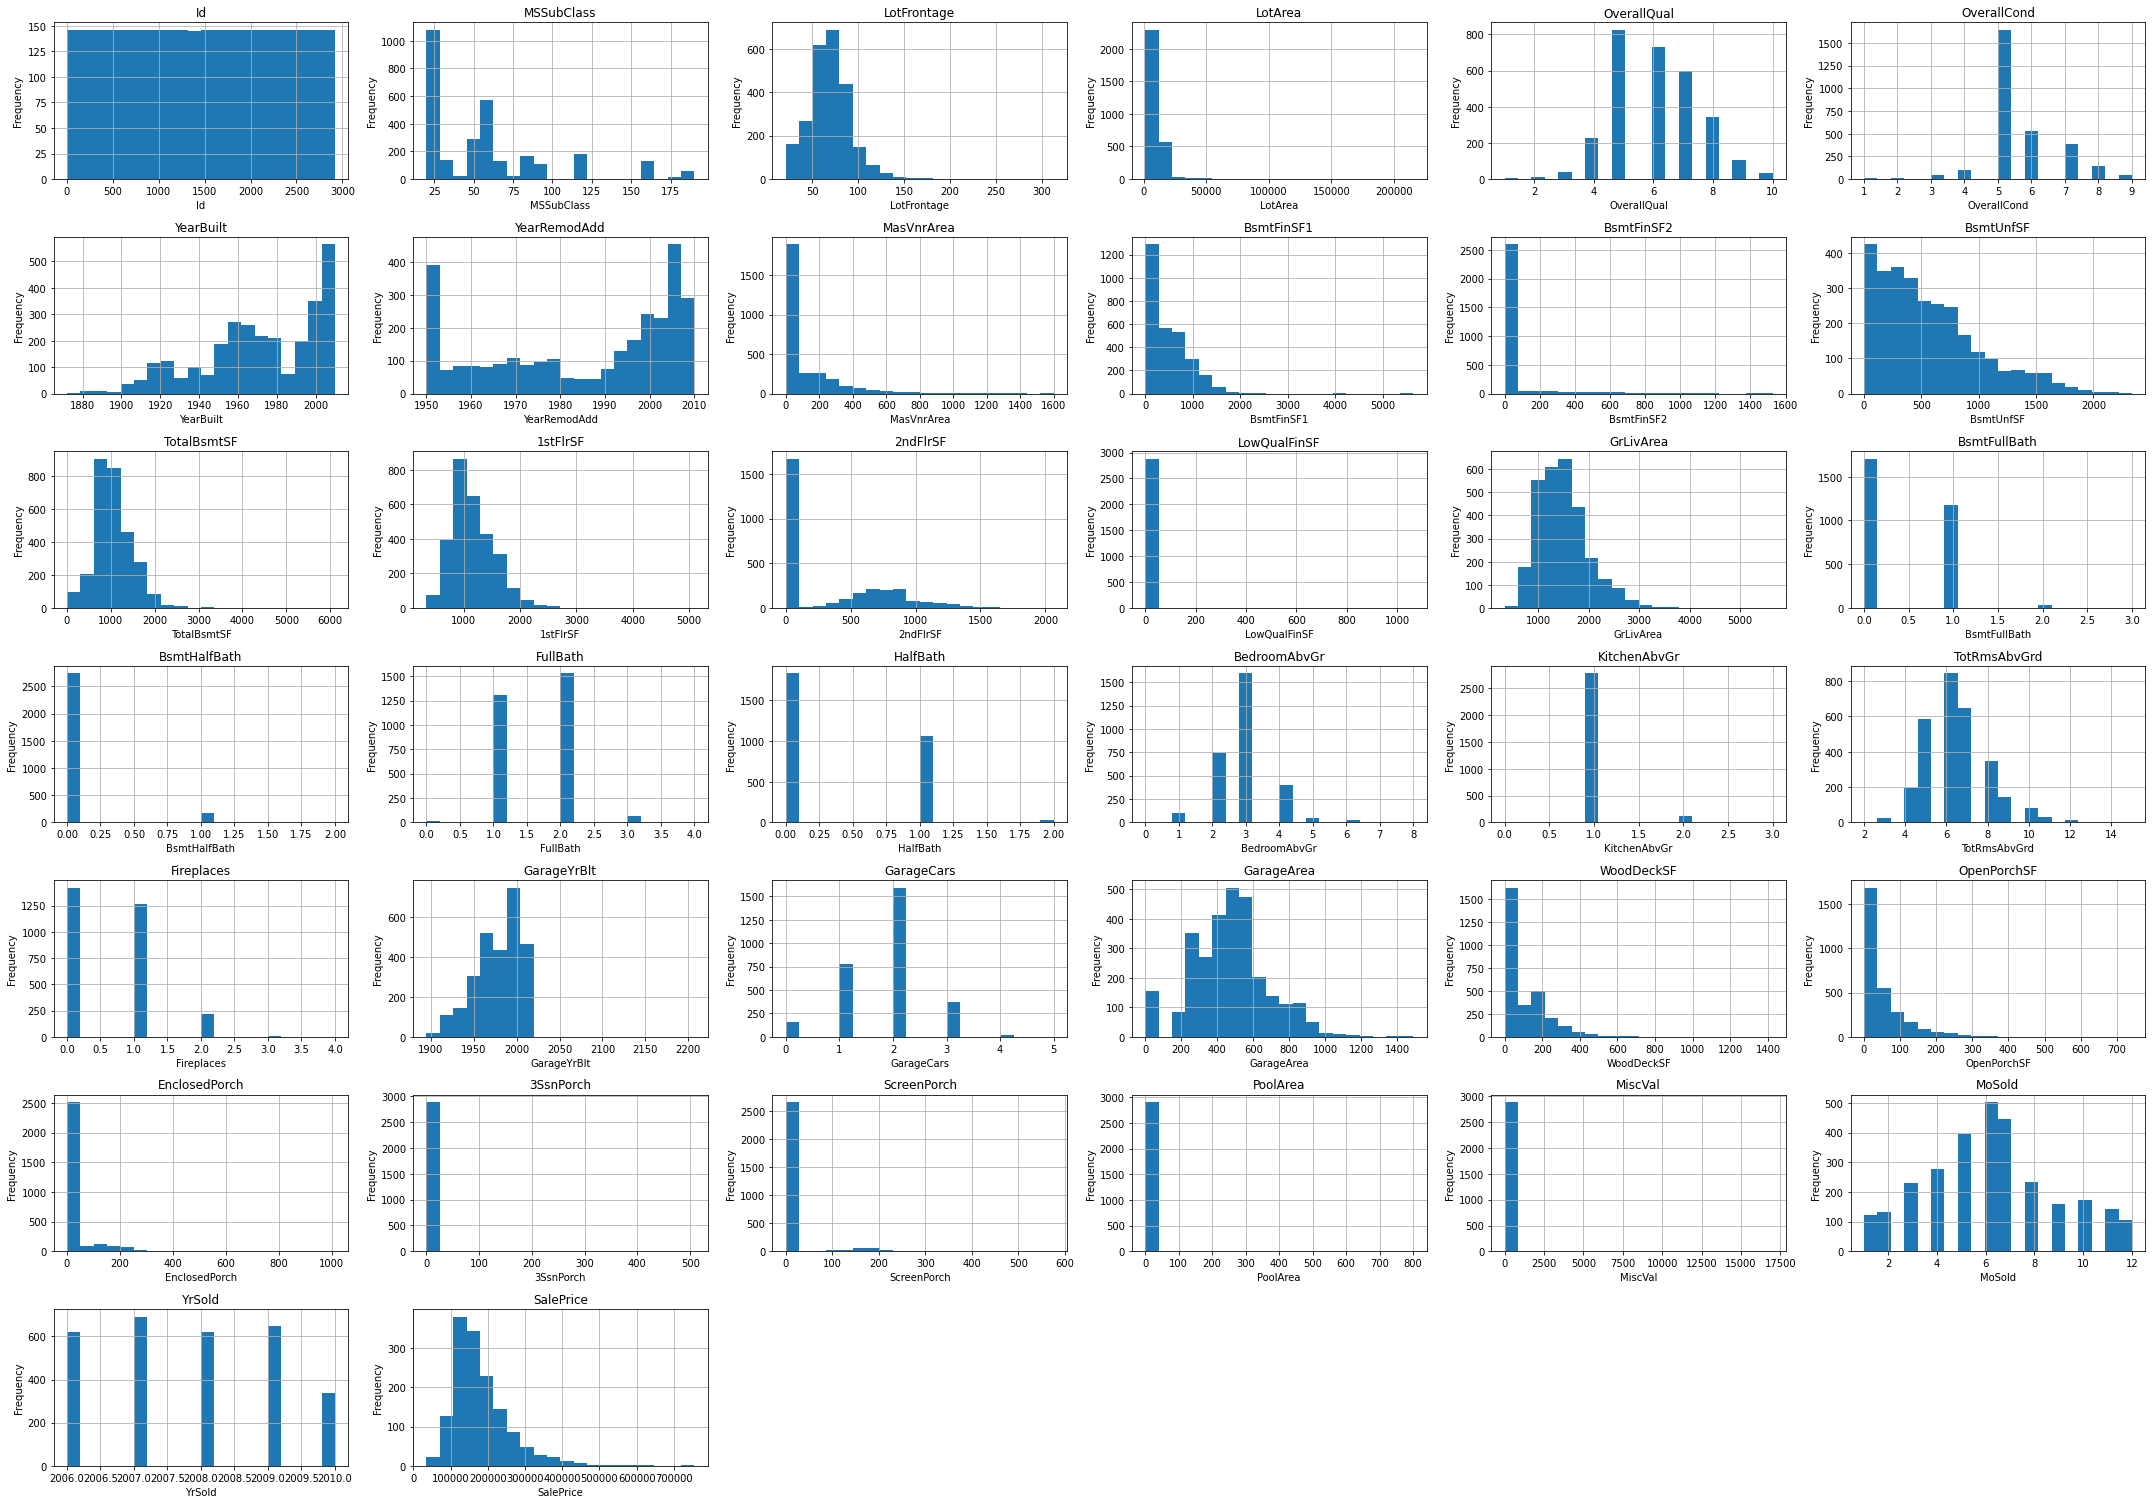

In [16]:
def num_summary(dataframe, numerical_cols):
    """
    Plots histograms for numerical variables
    """
    total_plots = len(numerical_cols)
    rows = math.ceil(total_plots / 6)  # Number of rows needed
    fig, axes = plt.subplots(rows, 6, figsize=(30, 3 * rows))
    axes = axes.flatten()  # Flatten axes for easy iteration
    for idx, col in enumerate(numerical_cols):
        dataframe[col].hist(bins=20, ax=axes[idx])
        axes[idx].set_title(col)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Frequency")
    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    
num_summary(df, num_cols)


## Correlation Analysis

In [17]:
corr = df[num_cols].corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.009,-0.028,-0.041,-0.030,-0.003,-0.017,-0.050,-0.025,-0.017,0.018,-0.014,-0.025,-0.009,-0.022,-0.038,-0.029,0.000,0.010,-0.010,-0.015,0.003,-0.012,-0.029,-0.035,-0.027,-0.010,-0.009,-0.007,0.010,0.022,-0.047,0.022,0.014,0.008,0.006,-0.256,-0.022
MSSubClass,0.009,1.000,-0.417,-0.202,0.034,-0.066,0.034,0.043,0.005,-0.064,-0.073,-0.126,-0.220,-0.249,0.309,0.026,0.072,0.010,-0.002,0.139,0.179,-0.009,0.260,0.041,-0.055,0.088,-0.047,-0.103,-0.018,-0.016,-0.021,-0.038,-0.049,-0.003,-0.029,-0.001,-0.015,-0.084
LotFrontage,-0.028,-0.417,1.000,0.490,0.218,-0.076,0.123,0.092,0.221,0.219,0.047,0.114,0.355,0.458,0.027,0.005,0.382,0.113,-0.026,0.182,0.039,0.235,0.005,0.350,0.262,0.077,0.311,0.360,0.122,0.165,0.012,0.028,0.076,0.174,0.044,0.011,-0.008,0.352
LotArea,-0.041,-0.202,0.490,1.000,0.101,-0.036,0.024,0.022,0.126,0.194,0.084,0.021,0.254,0.332,0.032,0.001,0.285,0.128,0.026,0.126,0.034,0.133,-0.021,0.214,0.261,-0.009,0.180,0.213,0.158,0.105,0.021,0.016,0.054,0.094,0.069,0.004,-0.024,0.264
OverallQual,-0.030,0.034,0.218,0.101,1.000,-0.094,0.598,0.572,0.433,0.282,-0.043,0.275,0.549,0.479,0.246,-0.048,0.575,0.165,-0.041,0.528,0.273,0.073,-0.159,0.390,0.391,0.572,0.601,0.565,0.255,0.298,-0.139,0.019,0.043,0.031,0.006,0.030,-0.020,0.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,0.014,-0.003,0.174,0.094,0.031,-0.017,0.002,-0.011,0.005,0.084,0.045,-0.032,0.072,0.122,0.045,0.035,0.135,0.044,0.067,0.028,0.001,0.037,-0.013,0.072,0.099,-0.014,0.030,0.053,0.094,0.064,0.093,-0.007,0.026,1.000,0.012,-0.042,-0.053,0.092
MiscVal,0.008,-0.029,0.044,0.069,0.006,0.034,-0.011,-0.003,0.045,0.093,-0.005,-0.010,0.084,0.093,-0.005,-0.006,0.067,-0.005,0.037,-0.010,0.027,0.000,0.025,0.061,0.009,-0.009,-0.017,0.008,0.057,0.077,0.009,-0.001,0.007,0.012,1.000,0.007,0.008,-0.021
MoSold,0.006,-0.001,0.011,0.004,0.030,-0.006,0.014,0.018,-0.000,-0.001,-0.010,0.023,0.018,0.040,0.014,0.012,0.044,-0.004,0.023,0.046,-0.001,0.056,0.035,0.045,0.032,0.024,0.051,0.040,0.018,0.034,-0.021,0.027,0.029,-0.042,0.007,1.000,-0.154,0.046
YrSold,-0.256,-0.015,-0.008,-0.024,-0.020,0.030,-0.012,0.033,-0.019,0.023,0.009,-0.038,-0.011,-0.013,-0.019,-0.002,-0.027,0.045,-0.020,-0.005,0.002,-0.020,0.035,-0.032,-0.007,-0.005,-0.023,-0.013,-0.000,-0.037,-0.001,0.023,-0.007,-0.053,0.008,-0.154,1.000,-0.029


In [22]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={"figure.figsize": (20, 20)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

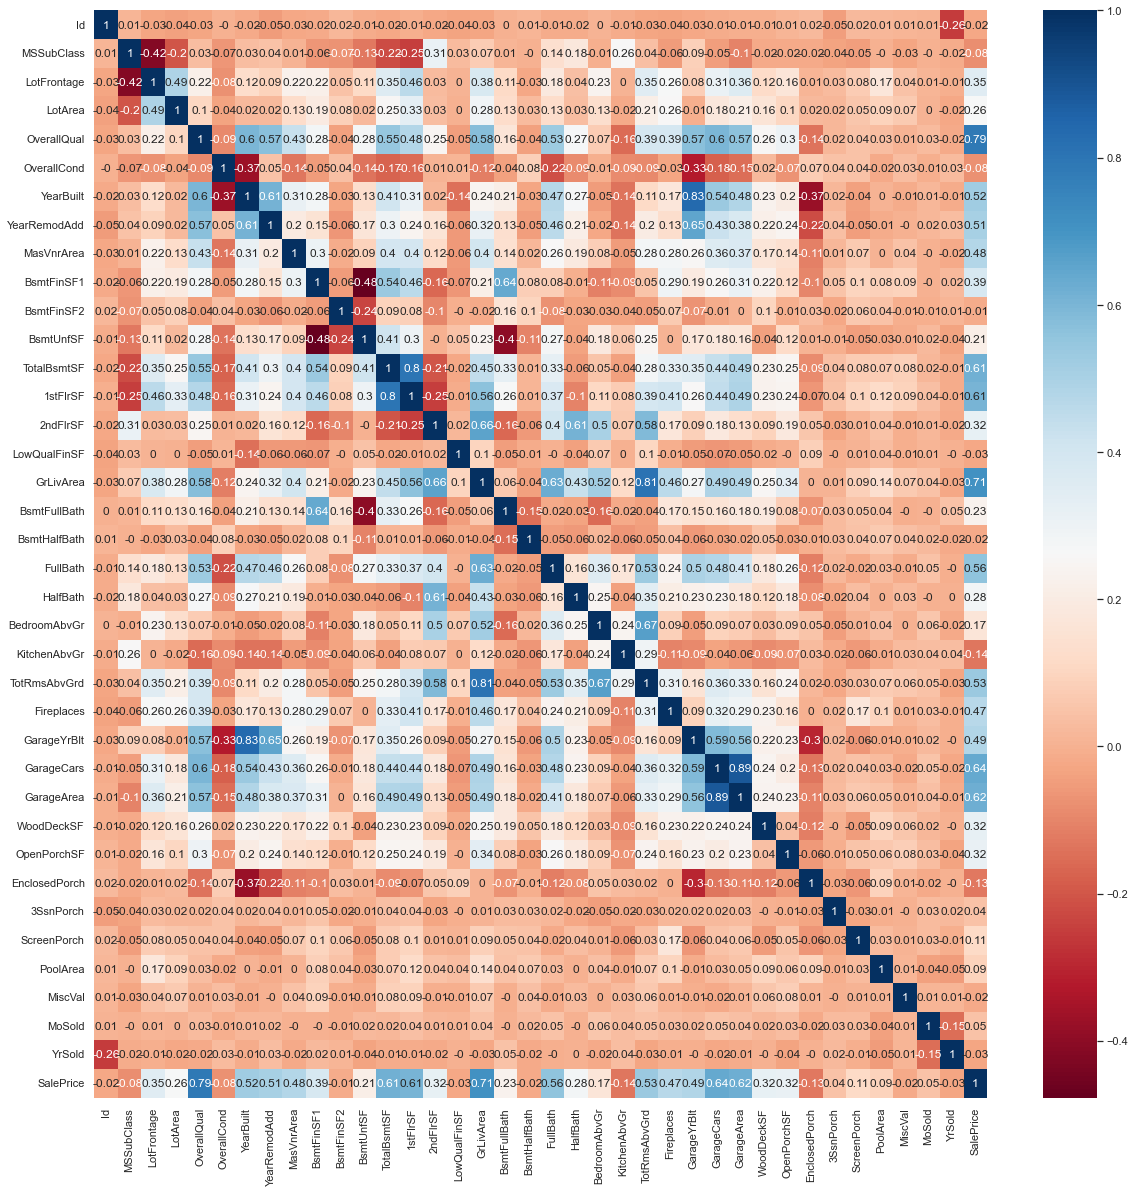

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [23]:
high_correlated_cols(df[num_cols], plot=True)